# Linear Regression

## House Price Prediction based on single feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_excel("house.xlsx")

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,720000
5,1100,340000


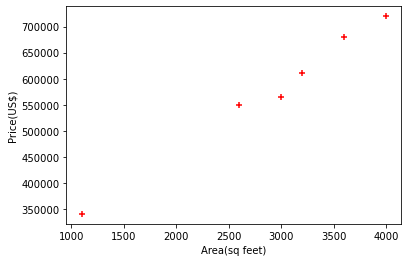

In [4]:
%matplotlib inline
plt.xlabel('Area(sq feet)')
plt.ylabel('Price(US$)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error is :', mean_squared_error(df[['area']], df.price))

Mean Squared Error is : 344787195000.0


In [7]:
m = reg.coef_

In [8]:
m

array([131.18297043])

In [9]:
b = reg.intercept_

In [10]:
b

194883.00292492675

In [11]:
x = 3300

In [12]:
y =m*x+b

In [13]:
y

array([627786.80532987])

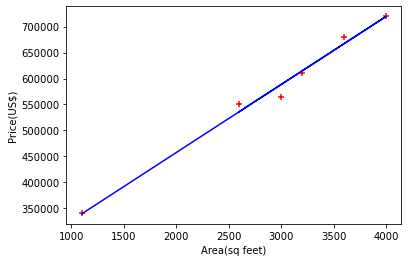

In [14]:
%matplotlib inline
plt.xlabel('Area(sq feet)')
plt.ylabel('Price(US$)')
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [15]:
d = pd.read_excel("htest.xlsx")

In [16]:
d

,area,prices
0,1000,326065.973351
1,1500,391657.458564
2,2300,496603.834904
3,1800,431012.349691
4,1200,352302.567436
5,3100,601550.211245
6,1600,404775.755606
7,2700,549077.023074
8,3500,654023.399415
9,2900,575313.617160


## House Price Prediction using Multiple features

In [17]:
df_X = pd.read_excel("ht.xlsx")
df_X

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,560000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [18]:
import math
median_bedrooms = math.floor(df_X.bedrooms.median())
median_bedrooms

3

In [19]:
df_X.bedrooms = df_X.bedrooms.fillna(median_bedrooms)
df_X

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,560000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [20]:
reg = linear_model.LinearRegression()
reg.fit(df_X[['area','bedrooms', 'age']], df_X.price)

LinearRegression()

In [21]:
print('Weights are : ', reg.coef_)
print('Weights are : ', reg.intercept_)

Weights are :  [   141.5 -29850.   -7050. ]
Weights are :  386650.00000000006


# Decision Tree

## Iris Flower Classification using Decision Tree

In [22]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()

In [24]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
X = iris.data
y = iris.target

In [26]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2)
len(X_tr), len(X_te)

(120, 30)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_d =  DecisionTreeClassifier()
model_d.fit(X_tr, y_tr)
y_predict = model_d.predict(X_te)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te, y_predict)

array([[13,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  5]], dtype=int64)

In [29]:
model_accuracy = model_d.score(X_te, y_te)
model_accuracy

0.9

# Support Vector Machine (SVM)

## Handwritten Digit Recognization using SVM

In [30]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [31]:
d_X = digits.data
d_y = digits.target
len(d_X), len(d_y)

(1797, 1797)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d_X, d_y, test_size = 0.3)
len(X_train), len(X_test)

(1257, 540)

In [33]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  1,  0,  4,  0,  0,  1, 47]], dtype=int64)

In [35]:
model_accuracy = model.score(X_test, y_test)
model_accuracy

0.9722222222222222

# Random Forest Classifier

## Wine Dataset classification using Random Forest Classifier

In [36]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [37]:
w_X = wine.data
w_y = wine.target
len(w_X), len(w_y)

(178, 178)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(w_X, w_y, test_size = 0.3)
len(X_train), len(X_test)

(124, 54)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[19,  1,  0],
       [ 0, 22,  0],
       [ 0,  0, 12]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print('Accuracy of Random Forest Classifier is :', accuracy)

Accuracy of Random Forest Classifier is : 0.9814814814814815


# Logistic Regression

## Iris dataset Classification using Logistic Regression Algorithm

In [42]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
len(X), len(y)

(150, 150)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
len(X_train), len(X_test)

(90, 60)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predict_i = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_i)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 27]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict_i)
print('Accuracy of Random Forest Classifier is :', accuracy)

Accuracy of Random Forest Classifier is : 0.9833333333333333


# K-Fold Cross Validation

## K_fold Cross validation for Breast Cancer

In [47]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [48]:
X_b = breast.data
y_b = breast.target
len(X_b), len(y_b)

(569, 569)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2)
len(X_train), len(X_test)

(455, 114)

In [50]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)
print('Decision Tree Score :',model.score(X_test, y_test))

Decision Tree Score : 0.8947368421052632


In [51]:
from sklearn.svm import SVC
model = SVC(C= 0.8, kernel = 'linear')
model.fit(X_train, y_train)
print('SVM Score:',model.score(X_test, y_test))

SVM Score: 0.9473684210526315


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
print('Random Forest Score :',model.score(X_test, y_test))

Random Forest Score : 0.9385964912280702


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print('Logistic Regression Score :',model.score(X_test, y_test))

Logistic Regression Score : 0.9385964912280702


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.model_selection import cross_val_score
print('Decision Tree Scores:', cross_val_score(DecisionTreeClassifier(), X_b, y_b))
print('SVM Scores:', cross_val_score(SVC(), X_b, y_b))
print('Random Forest Scores:', cross_val_score(RandomForestClassifier(), X_b, y_b))
print('Logistic Regression Scores:', cross_val_score(LogisticRegression(), X_b, y_b))

Decision Tree Scores: [0.9122807  0.90350877 0.90350877 0.92105263 0.91150442]
SVM Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Random Forest Scores: [0.92982456 0.93859649 0.99122807 0.97368421 0.96460177]
Logistic Regression Scores: [0.93859649 0.93859649 0.95614035 0.92105263 0.96460177]


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

# Leave One Out CV

## Leave One Out Cross validation for Breast Cancer

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [56]:
X_cancer = breast.data
y_cancer = breast.target
len(X_cancer), len(y_cancer)

(569, 569)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.3)
len(X_train), len(X_test)

(398, 171)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[ 51,   3],
       [ 10, 107]], dtype=int64)

In [60]:
from sklearn.metrics import precision_score, recall_score
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))

Precision : 0.9727272727272728
Recall : 0.9145299145299145


In [61]:
from sklearn.metrics import f1_score
print("f1 Score is :", f1_score(y_test, y_predict))

f1 Score is : 0.9427312775330396


In [62]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_cancer, y_cancer, cv=LeaveOneOut())
scores[0:5]

array([1., 1., 1., 1., 1.])

# K-Nearest Neighbors Classifier

## Classification of Breast Cancer using KNN

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = breast.data
y_cancer = breast.target
len(X_cancer), len(y_cancer)

(569, 569)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.3)
len(X_train), len(X_test)

(398, 171)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predict_K = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
print("KNN Classifier Model Score is:", accuracy_score(y_test, predict_K))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_K))
print("Precision Score is:", precision_score(y_test, predict_K))
print("Recall Score is:", recall_score(y_test, predict_K))
print("F1 Score is:", f1_score(y_test, predict_K))
print("MCC Score is:", matthews_corrcoef(y_test, predict_K))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_K))

KNN Classifier Model Score is: 0.9064327485380117
Confusion Matrix is: [[58 11]
 [ 5 97]]
Precision Score is: 0.8981481481481481
Recall Score is: 0.9509803921568627
F1 Score is: 0.9238095238095237
MCC Score is: 0.8050565257725073
ROC-AUC Score is: 0.8957800511508951


# Gradient Boosting 

## Classification of Breast Cancer using Gradient Boosting

In [67]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = breast.data
y_cancer = breast.target
len(X_cancer), len(y_cancer)

(569, 569)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.3)
len(X_train), len(X_test)

(398, 171)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predict_G = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
print("Gradient Boosting Classifier Model Score is:", accuracy_score(y_test, predict_G))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_G))
print("Precision Score is:", precision_score(y_test, predict_G))
print("Recall Score is:", recall_score(y_test, predict_G))
print("F1 Score is:", f1_score(y_test, predict_G))
print("MCC Score is:", matthews_corrcoef(y_test, predict_G))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_G))

Gradient Boosting Classifier Model Score is: 0.9649122807017544
Confusion Matrix is: [[ 54   4]
 [  2 111]]
Precision Score is: 0.9652173913043478
Recall Score is: 0.9823008849557522
F1 Score is: 0.9736842105263158
MCC Score is: 0.9213837749470907
ROC-AUC Score is: 0.9566676838571865


# Artifitial Neural Network

## Classification of Breast Cancer using ANN

In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = breast.data
y_cancer = breast.target
len(X_cancer), len(y_cancer)

(569, 569)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = 0.2)
len(X_train), len(X_test)

(455, 114)

In [83]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
predict_A = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
print("ANN Model Score is:", accuracy_score(y_test, predict_A))
print("Confusion Matrix is:", confusion_matrix(y_test, predict_A))
print("Precision Score is:", precision_score(y_test, predict_A))
print("Recall Score is:", recall_score(y_test, predict_A))
print("F1 Score is:", f1_score(y_test, predict_A))
print("MCC Score is:", matthews_corrcoef(y_test, predict_A))
print("ROC-AUC Score is:", roc_auc_score(y_test, predict_A))

ANN Model Score is: 0.9298245614035088
Confusion Matrix is: [[35  3]
 [ 5 71]]
Precision Score is: 0.9594594594594594
Recall Score is: 0.9342105263157895
F1 Score is: 0.9466666666666667
MCC Score is: 0.8447972729788091
ROC-AUC Score is: 0.9276315789473684
